<p style="font-family: Arial; font-size:2.5em;color:green; font-style:bold"><br>
Employee Attrition
</p><br>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

We will analyze a dataset of employees to gain insights on employee attrition. You may refer to the Word document for data description and variable definitions.

In [2]:
# Import packages: pandas, matplotlib, seaborn, statsmodels, etc.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read in the dataset
df = pd.read_csv('/content/Employee_Attrition.csv')

In [4]:
# Check basic information using .info(), .columns and .head()
df.info()
df.columns
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


1. Understand the dataset. There are 35 variables. To better understand them, we can conceptually organize them into different categories. Use the Word document, categorize the variable names to their corresponding categories and write them in the cell below. I wrote one as an example. <br>
After this exercise, you will have a clear picture of the variables and what they measure.

In [5]:
# Identifier
  # 'EmployeeNumber'

# Attrition
  # 'Attrition'

# Employee demographics
  # 'Age', 'Education', 'EducationField', 'Gender', 'MaritalStatus'

# Job-related
  # 'BusinessTravel', 'Department','JobInvolvement', 'JobLevel', 'JobRole'
  # 'JobSatisfaction','OverTime'

# Work environment
  # 'DistanceFromHome', 'EnvironmentSatisfaction', 'RelationshipSatisfaction','WorkLifeBalance'

# Compensation
 # 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate','PercentSalaryHike',
 #  'StockOptionLevel'

# Performance
 # 'PerformanceRating'

# Job history
 # 'TotalWorkingYears', 'TrainingTimesLastYear', 'NumCompaniesWorked'
 # 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager'

# Variables with constant values for the whole dataset
 # 'EmployeeCount', 'Over18', 'StandardHours'

2. For the purpose of building a model to predict attrition, which variable is the target variable? Explore this variable distribution. How many employees have left the company?

,count
Attrition,
No,1233
Yes,237


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Attrition', ylabel='count'>

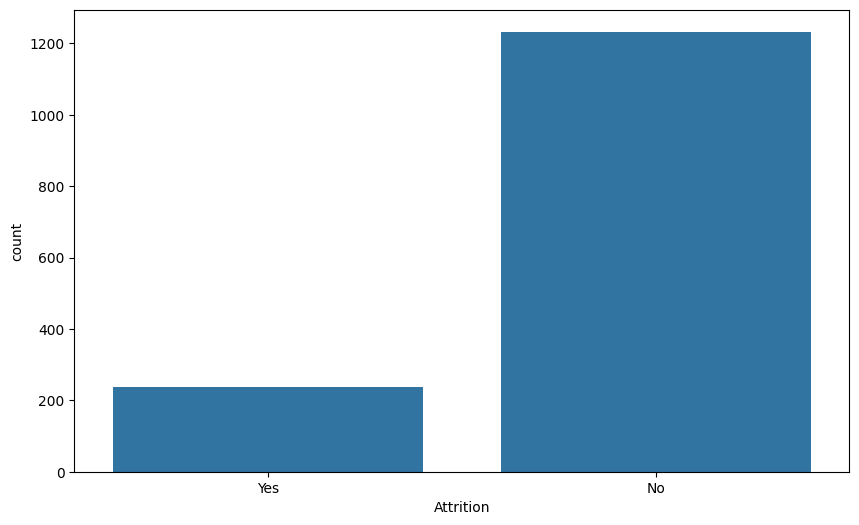

In [6]:
# Attrition is the target variable.
df['Attrition'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data = df, x = 'Attrition')
plt.show()

# 237 employees have left the company

3. Let's start to prepare the data for analysis. First, we can drop the following variables: the identifier and variables with constant values. They do not contribute any information to the analysis.

In [7]:
df=df.drop(['EmployeeNumber','EmployeeCount','Over18','StandardHours'],axis=1)

4. We may expect the variables of compensation may be correlated with each other. For instance, montly income and monthly rate should be correlated. Please explore the correlation between them using both numbers and a graph. Do the same for 'DailyRate', 'HourlyRate' and 'MonthlyRate'. What do you find?

In [8]:
corr = df['MonthlyIncome'].corr(df['MonthlyRate'])
corr
correlated = df[['MonthlyIncome', 'MonthlyRate', 'DailyRate', 'HourlyRate']].corr()
correlated

#All the correlation values are very close to zero, indicating weak or negligible relationships between these variables.

np.float64(0.034813626134121804)

,MonthlyIncome,MonthlyRate,DailyRate,HourlyRate
MonthlyIncome,1.000000,0.034814,0.007707,-0.015794
MonthlyRate,0.034814,1.000000,-0.032182,-0.015297
DailyRate,0.007707,-0.032182,1.000000,0.023381
HourlyRate,-0.015794,-0.015297,0.023381,1.000000


5. Make histograms for all the compensation variables. What do you find?

<Figure size 1500x1000 with 0 Axes>

<Axes: >

<Axes: xlabel='DailyRate', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of DailyRate')

Text(0.5, 0, 'DailyRate')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='HourlyRate', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of HourlyRate')

Text(0.5, 0, 'HourlyRate')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of MonthlyIncome')

Text(0.5, 0, 'MonthlyIncome')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='MonthlyRate', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of MonthlyRate')

Text(0.5, 0, 'MonthlyRate')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='PercentSalaryHike', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of PercentSalaryHike')

Text(0.5, 0, 'PercentSalaryHike')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='StockOptionLevel', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of StockOptionLevel')

Text(0.5, 0, 'StockOptionLevel')

Text(0, 0.5, 'Frequency')

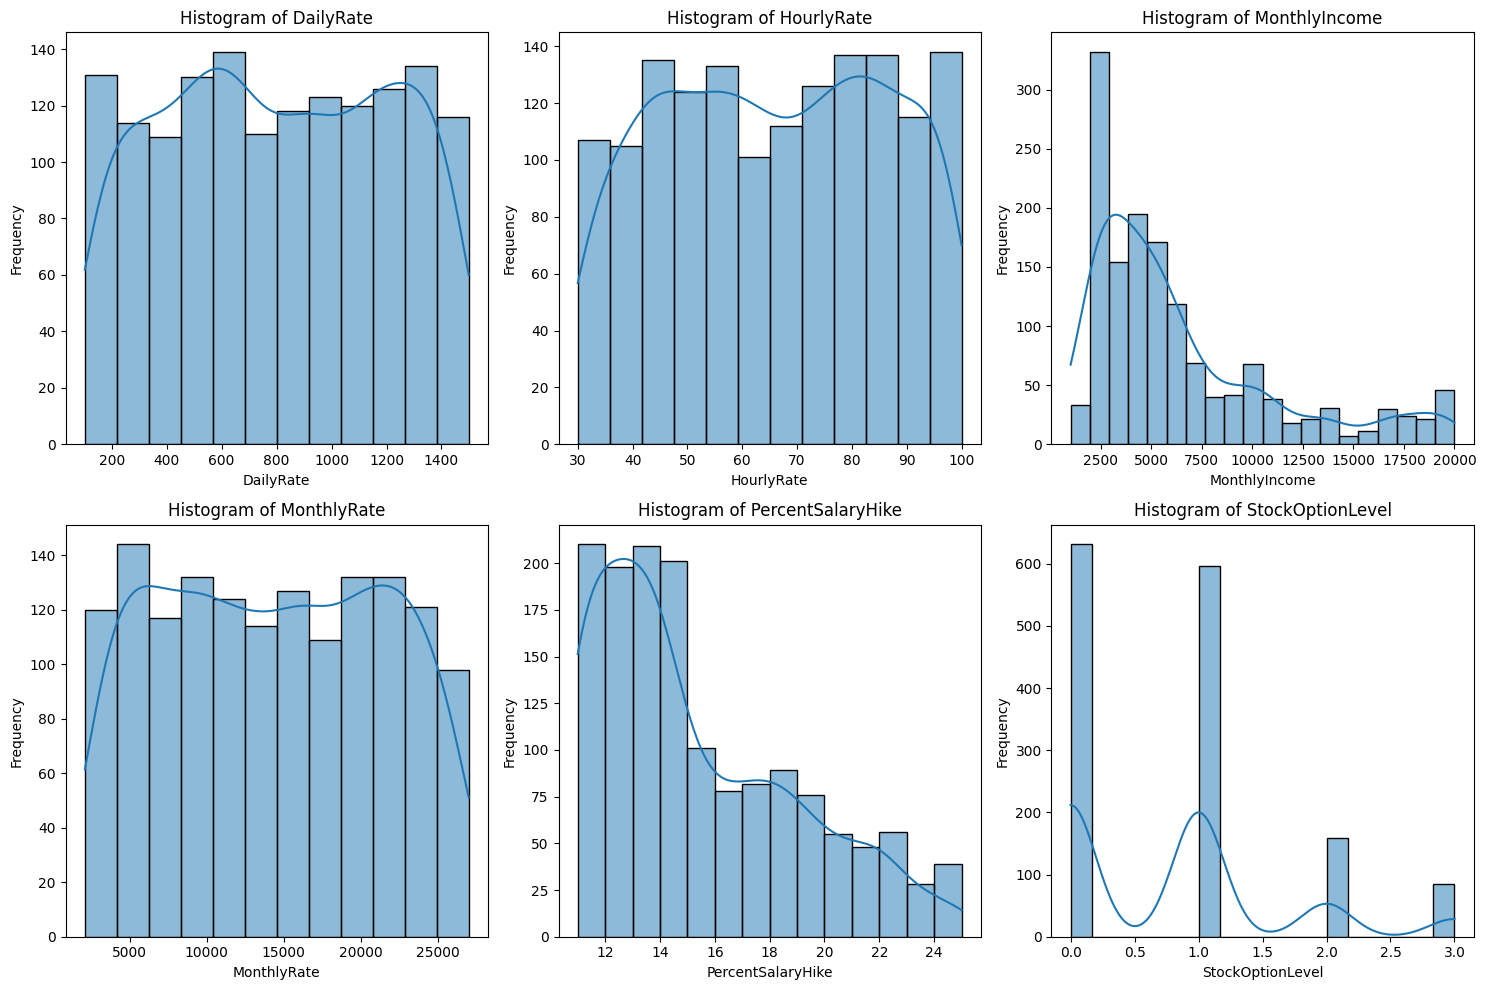

In [9]:
Compensations = ['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'StockOptionLevel']
plt.figure(figsize=(15, 10))
for i, variable in enumerate(Compensations):
    plt.subplot(2, 3, i + 1)  # Create subplots for each variable
    sns.histplot(df[variable], kde=True)  # Histogram with KDE for better visualization
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Observations from the histograms (example, your observations may vary):
# DailyRate, HourlyRate and MonthlyRate appear to be roughly uniform distributed.
# PercentSalaryHike and MonthlyIncome are skewed slightly to the left.
# StockOptionLevel is highly skewed towards lower values.

The distribution of 'MonthlyIncome', 'PercentSalaryHike' and 'StockOptionLevel' seem to follow a skewed normal distribution that fit our common sense, but the rate variable distributions do not seem so. So, we decide to drop the rate variables.

In [10]:
df = df.drop(['DailyRate', 'HourlyRate', 'MonthlyRate'], axis=1)

6. Make a graph to examine the relationship between 'Attrition' and 'MonthlyIncome'. What do you find?

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

Text(0.5, 1.0, 'Monthly Income vs. Attrition')

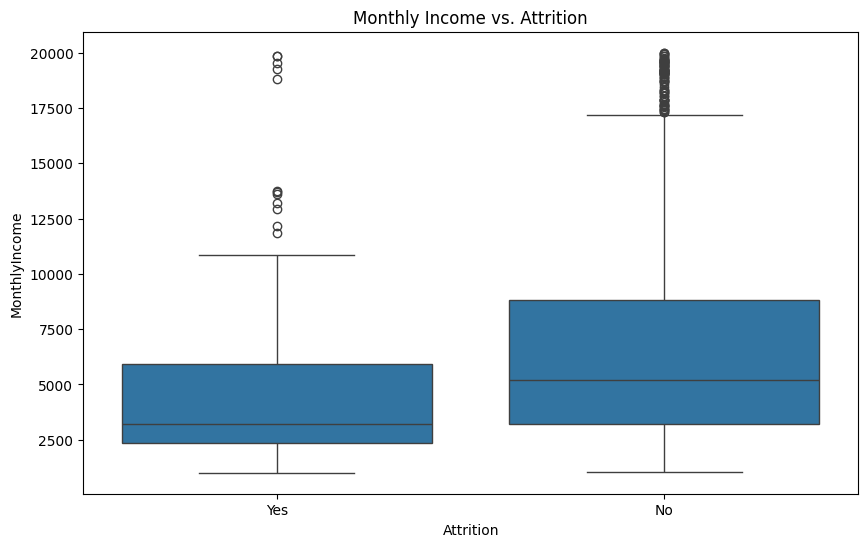

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income vs. Attrition')
plt.show()

#The box plot shows the distribution of monthly income for employees who have attrited (left the company) and those who have not.
#We can observe that the median monthly income for employees who attrited appears slightly lower than those who did not attrite.
#Also, the range of incomes is wider for those who did not attrite, but there are outliers in the attrited group.
#However, it doesn't seem like there's a dramatic difference.

Based on the exploration of Step 4, 5, and 6. We may decide that to include only 'MonthlyIncome', 'PercentSalaryHike', and 'StockOptionLevel' in the model. (The correlation analysis is not consistent with our common sense, which may indicate that the rate variables may have problems. So, we decide not to use them.)

7. Let's move to explore demographic variables, using the education variables as an example. I made a graph to examine their combined distribution, which can represent the pivot table of the two variables. From the graph, you may find that most employees are in the fields of life sciences and medical. Bachelor's degrees are the most across fields.<br>
<br>
<I>Now you may pick one variable in demographics to explore its relationship with Attrition. For categorical variables, you may use the countplot as in my example to display.</I>

In [12]:
pd.pivot_table(data = df, index = 'Education', columns = 'EducationField',
               values = 'Attrition', aggfunc = 'count')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Education,,,,,,
1,2,67,14,63,5,19
2,2,116,24,99,19,22
3,16,233,59,183,24,57
4,5,173,52,104,33,31
5,2,17,10,15,1,3


<Figure size 1000x600 with 0 Axes>

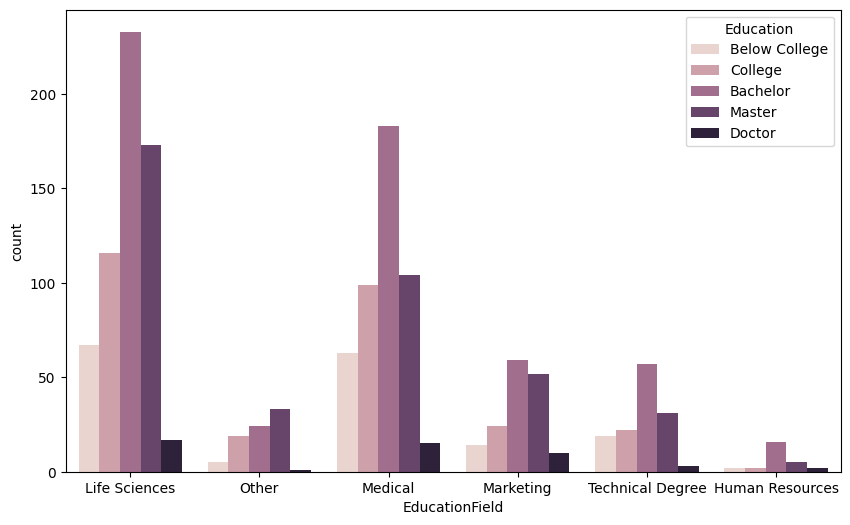

In [13]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data = df, x = 'EducationField', hue = 'Education')
ax.legend(title='Education', labels=['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Attrition by Gender')

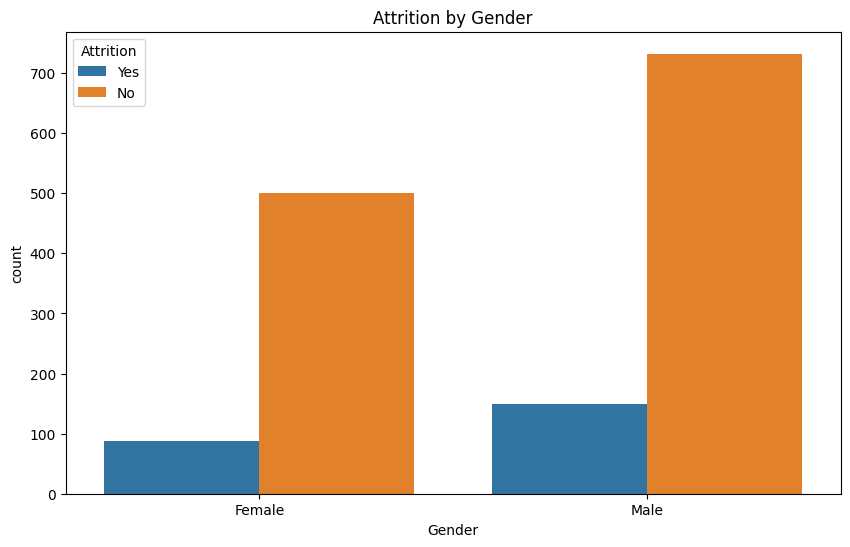

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Attrition by MaritalStatus')

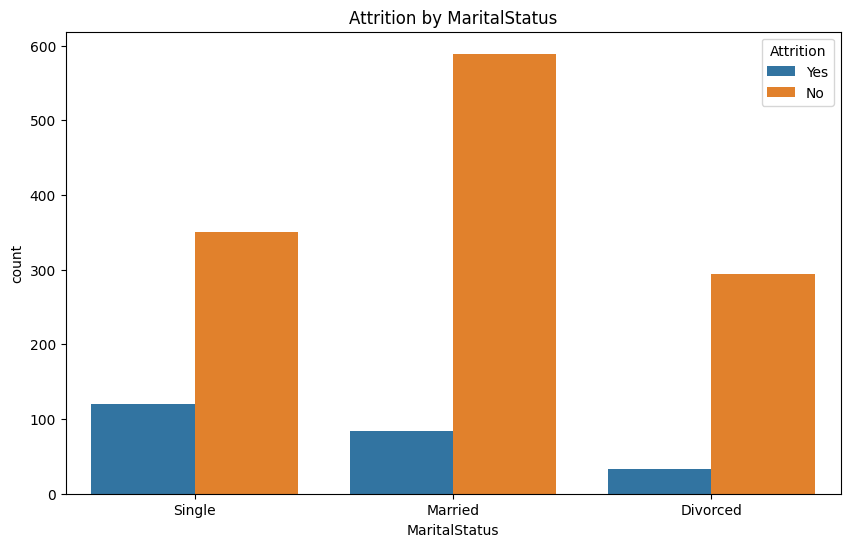

In [14]:
# Explore the relationship between 'Gender' and 'Attrition'
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Gender', hue='Attrition')
ax.set_title('Attrition by Gender')
plt.show()

# Explore the relationship between 'Gender' and 'Attrition'
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='MaritalStatus', hue='Attrition')
ax.set_title('Attrition by MaritalStatus')
plt.show()

8. Next is to the category of 'Job related'. Examine 'JobRole' with two graphs: its distrition and relationship with Attrition. What do you find? Which roles are more likely to leave?

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='JobRole', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Job Roles')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

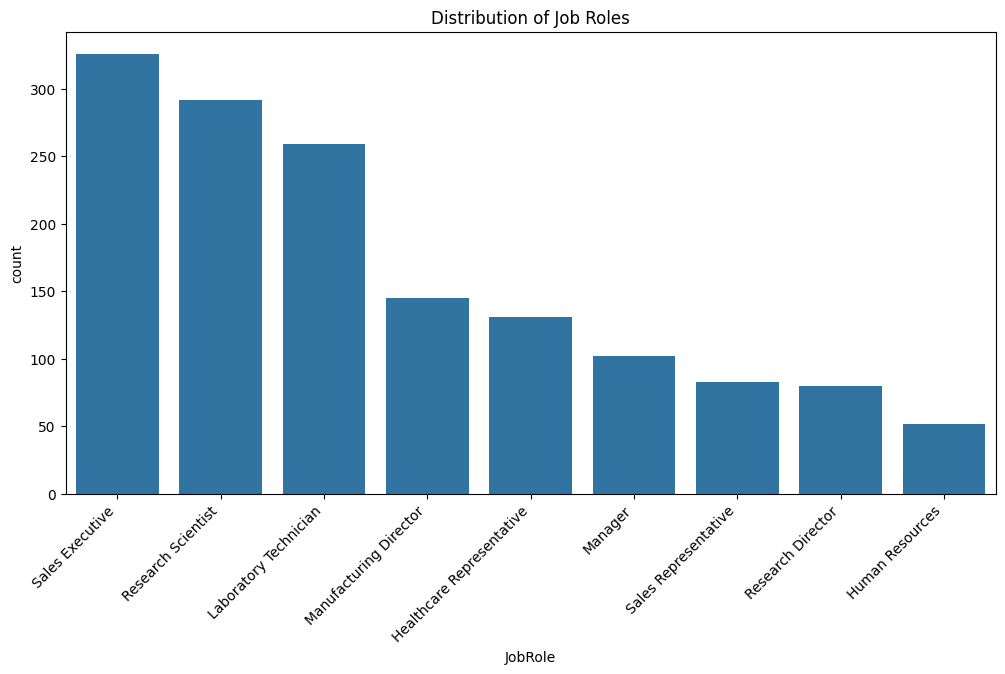

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='JobRole', ylabel='count'>

Text(0.5, 1.0, 'Attrition by Job Role')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

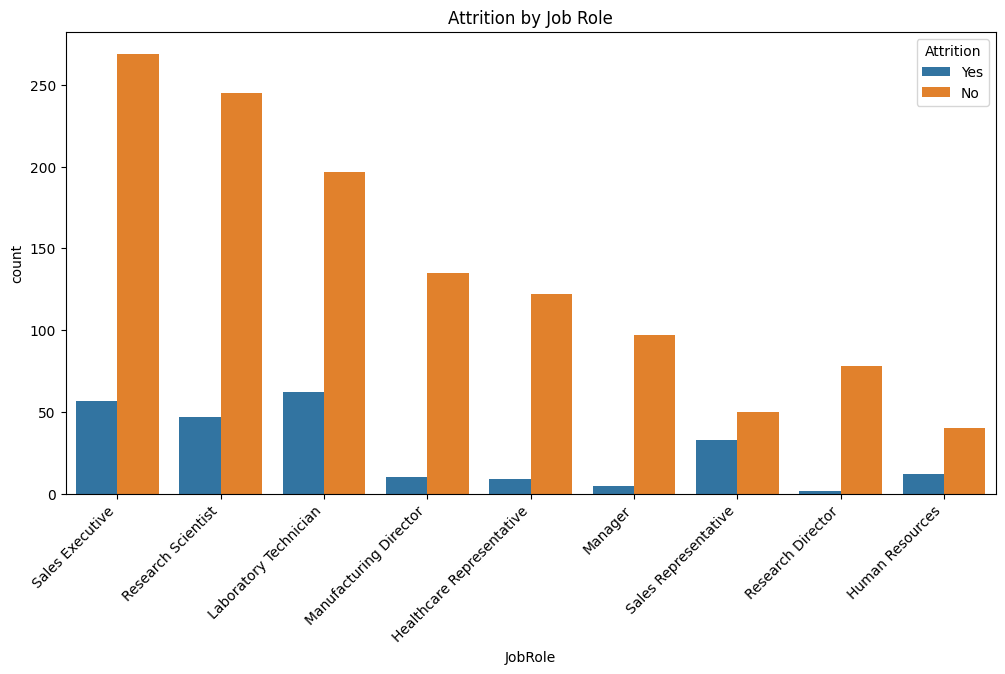

Attrition                  Attrition Rate
JobRole                                  
Sales Representative             0.397590
Laboratory Technician            0.239382
Human Resources                  0.230769
Sales Executive                  0.174847
Research Scientist               0.160959
Manufacturing Director           0.068966
Healthcare Representative        0.068702
Manager                          0.049020
Research Director                0.025000


In [15]:
# Distribution of JobRole
plt.figure(figsize=(12, 6))
sns.countplot(x='JobRole', data=df)
plt.title('Distribution of Job Roles')
plt.xticks(rotation=45, ha='right')
plt.show()

# Relationship between JobRole and Attrition
plt.figure(figsize=(12, 6))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.title('Attrition by Job Role')
plt.xticks(rotation=45, ha='right')
plt.show()

# Further analysis (optional): Calculate attrition rates for each role
attrition_rates = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack()
attrition_rates['Attrition Rate'] = attrition_rates['Yes']
print(attrition_rates[['Attrition Rate']].sort_values(by='Attrition Rate', ascending=False))


# Sales Executives, Research Scientists, and Laboratory Technicians are the most likely to leave the company.
# Managerial and Research Director roles experience lower attrition, indicating higher stability.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Attrition', ylabel='count'>

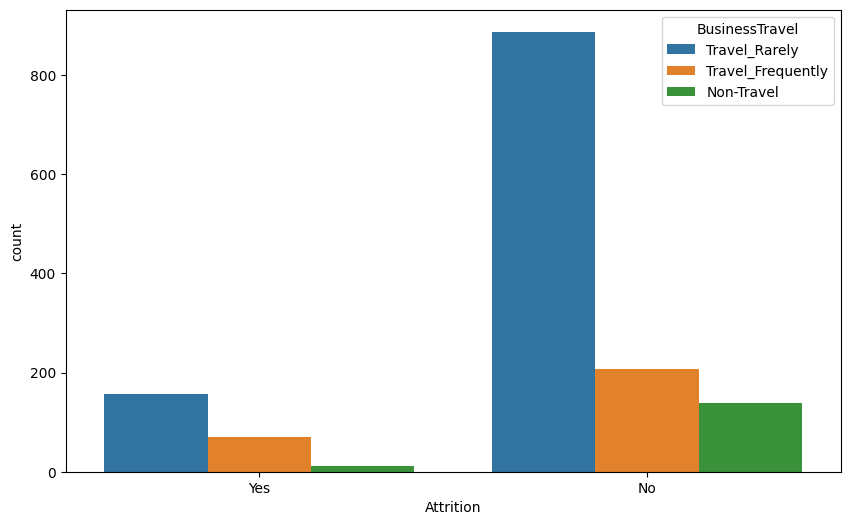

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Attrition', ylabel='count'>

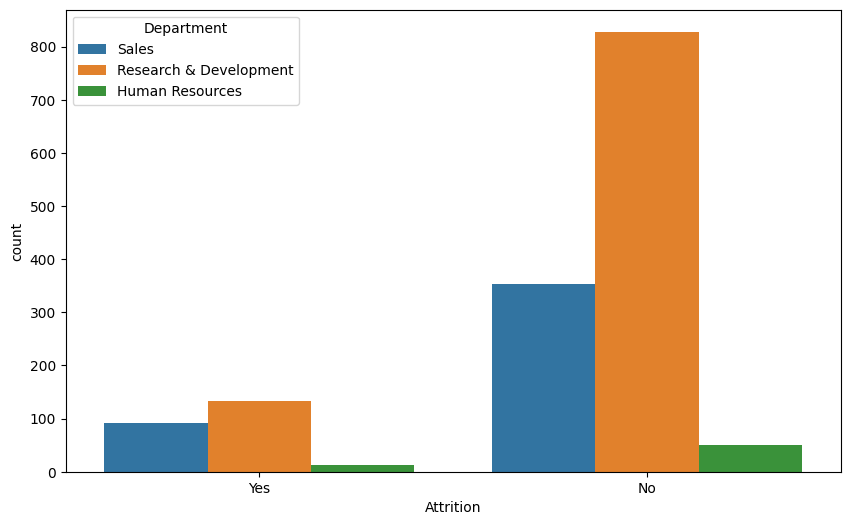

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Attrition', ylabel='count'>

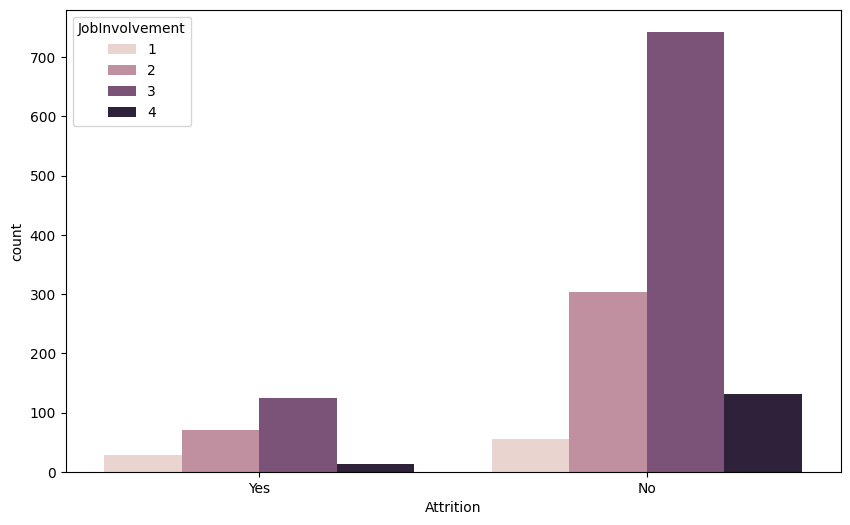

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Attrition', ylabel='count'>

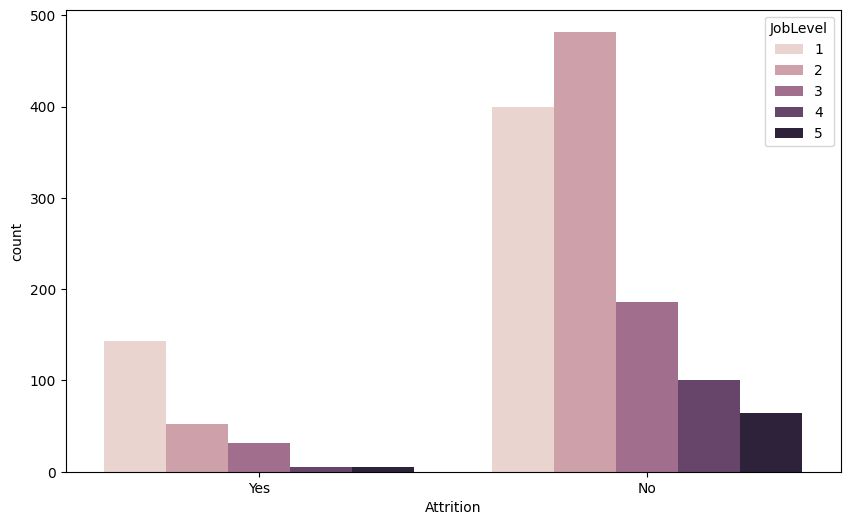

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Attrition', ylabel='count'>

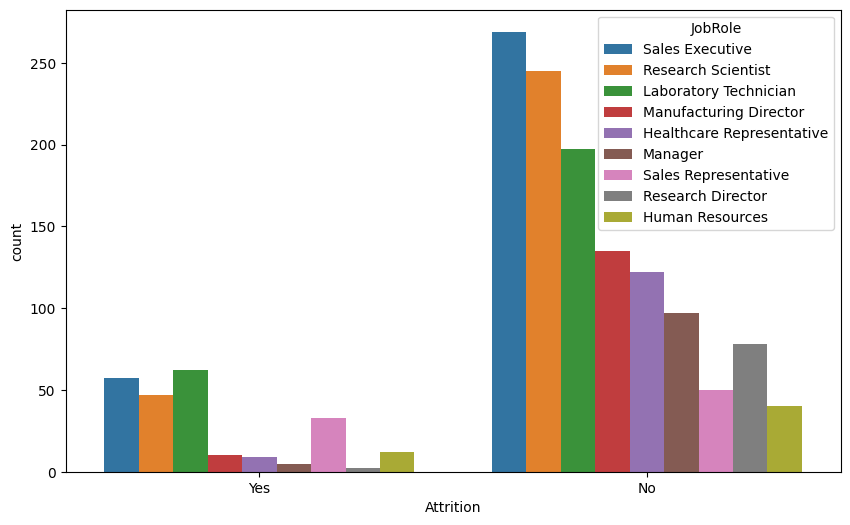

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Attrition', ylabel='count'>

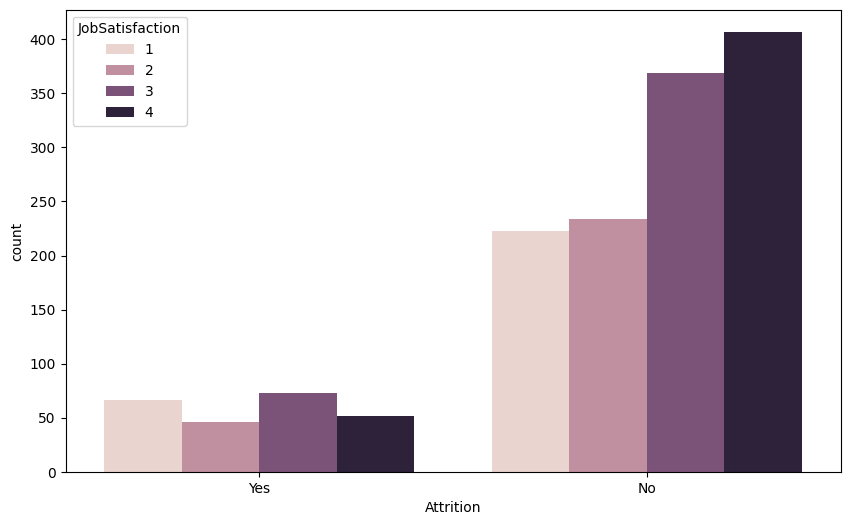

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Attrition', ylabel='count'>

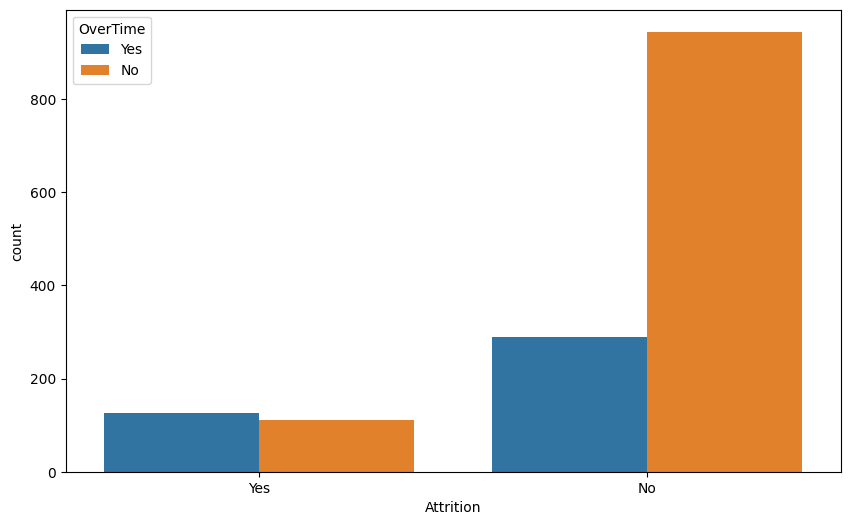

In [16]:
for var in ['BusinessTravel', 'Department','JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction','OverTime']:
        plt.figure(figsize=(10, 6))
        sns.countplot(data = df, x = 'Attrition', hue = var)
        plt.show()

# More likely to leave:
  # travel rarely
  # research & development
  # job involvement 3(high)
  # Level 1 jobs
  # laboratory technician
  # job satisfaction 3 (high)
  # More overtime

I did the same for every job related variables. I intended to explore whether these variables play a role and the results will guide the model building later. The conclusion is that all these variables seem to be relevant to attrition outcome.

9. Let's move to work environment features. Similarly, pick one variable to examine its distritbution and relationship with attrition. Report your findings.

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='WorkLifeBalance', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Work-Life Balance')

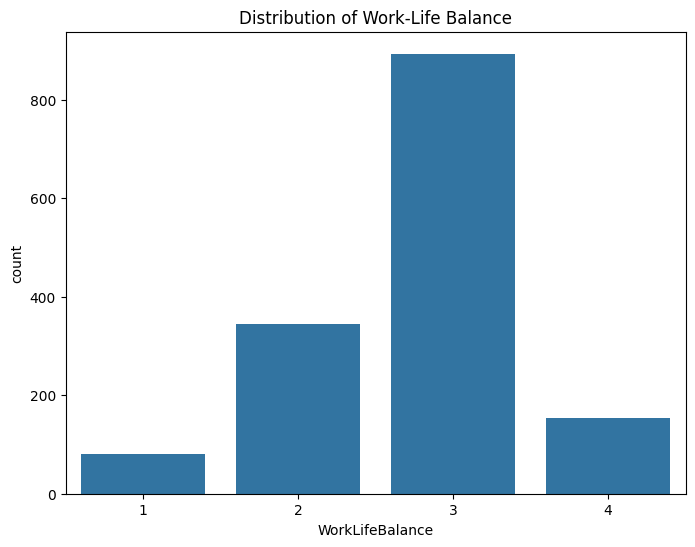

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='WorkLifeBalance', ylabel='count'>

Text(0.5, 1.0, 'Attrition by Work-Life Balance')

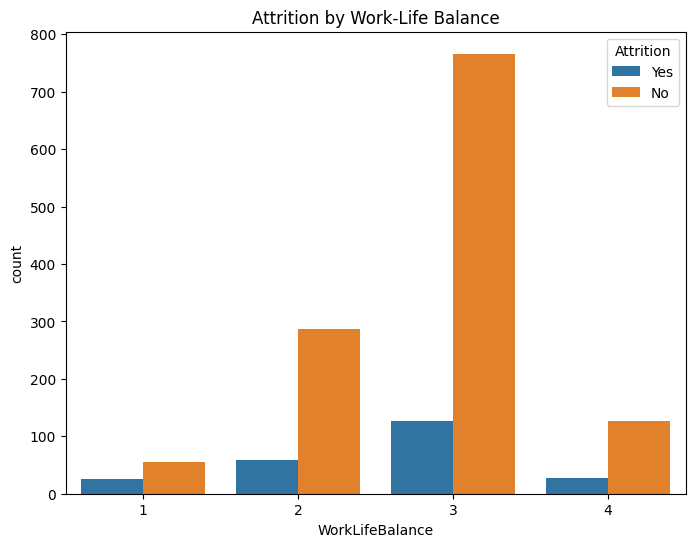

Attrition        Attrition Rate
WorkLifeBalance                
1                      0.312500
4                      0.176471
2                      0.168605
3                      0.142217


In [17]:
# Distribution of 'WorkLifeBalance'
plt.figure(figsize=(8, 6))
sns.countplot(x='WorkLifeBalance', data=df)
plt.title('Distribution of Work-Life Balance')
plt.show()

# Relationship between 'WorkLifeBalance' and 'Attrition'
plt.figure(figsize=(8, 6))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df)
plt.title('Attrition by Work-Life Balance')
plt.show()

# Calculate attrition rates for each work-life balance level
attrition_rates = df.groupby('WorkLifeBalance')['Attrition'].value_counts(normalize=True).unstack()
attrition_rates['Attrition Rate'] = attrition_rates['Yes']
print(attrition_rates[['Attrition Rate']].sort_values(by='Attrition Rate', ascending=False))

In [18]:
col=['EnvironmentSatisfaction', 'RelationshipSatisfaction','WorkLifeBalance']
for var in col:
        df[var].value_counts()

,count
EnvironmentSatisfaction,
3,453
4,446
2,287
1,284


,count
RelationshipSatisfaction,
3,459
4,432
2,303
1,276


,count
WorkLifeBalance,
3,893
2,344
4,153
1,80


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Attrition', ylabel='count'>

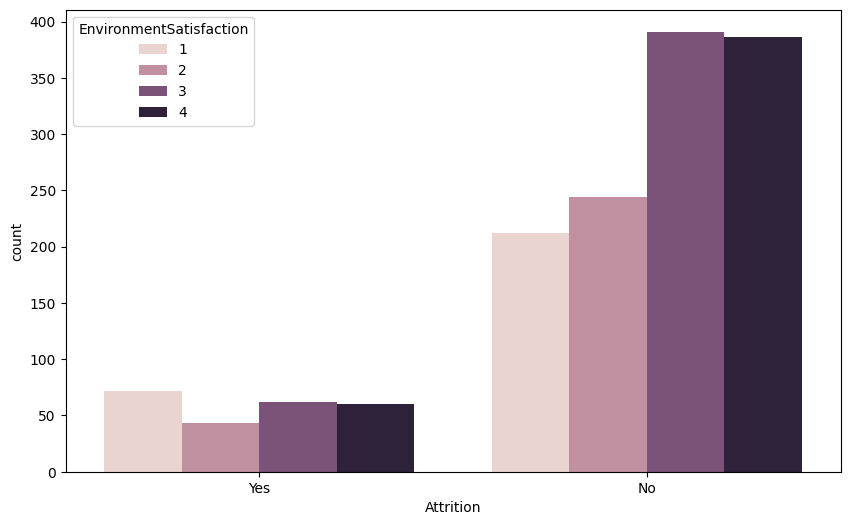

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Attrition', ylabel='count'>

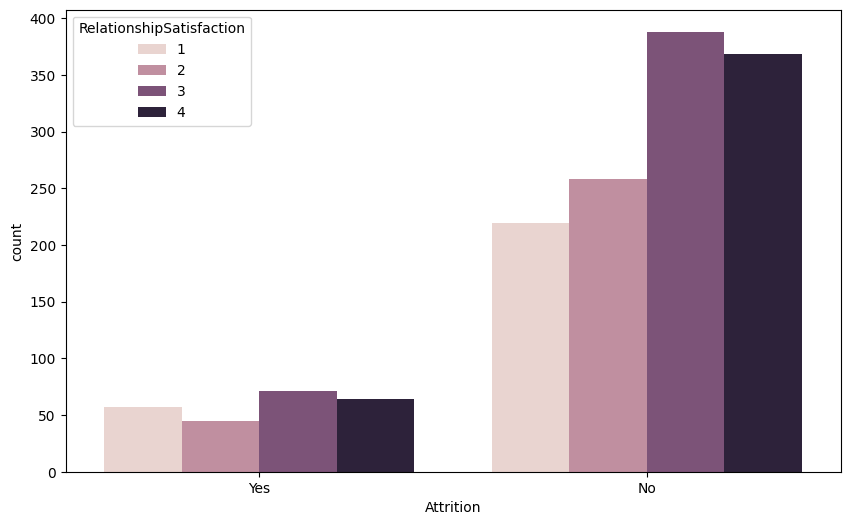

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Attrition', ylabel='count'>

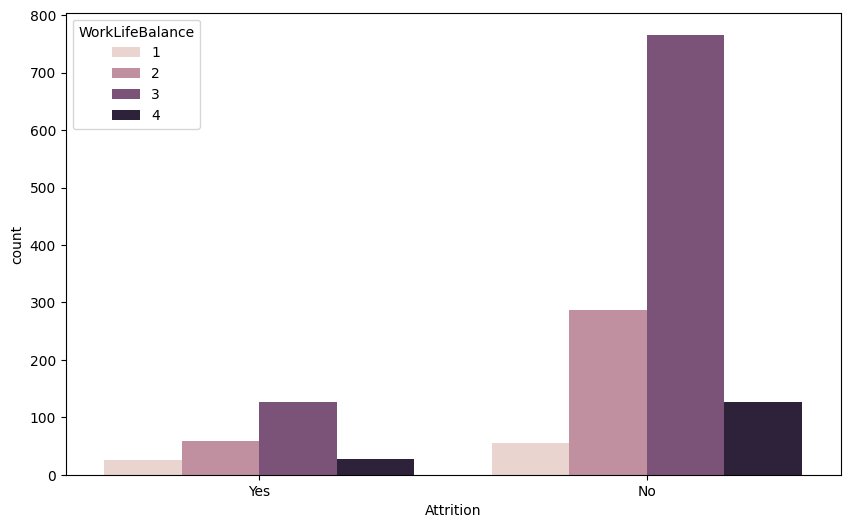

In [19]:
for var in ['EnvironmentSatisfaction', 'RelationshipSatisfaction','WorkLifeBalance']:
        plt.figure(figsize=(10, 6))
        sns.countplot(data = df, x = 'Attrition', hue = var)
        plt.show()

I explored all these variables and decided that we will include them in the model.

10. The last group of variables is about work history.

<Axes: xlabel='TotalWorkingYears', ylabel='Count'>

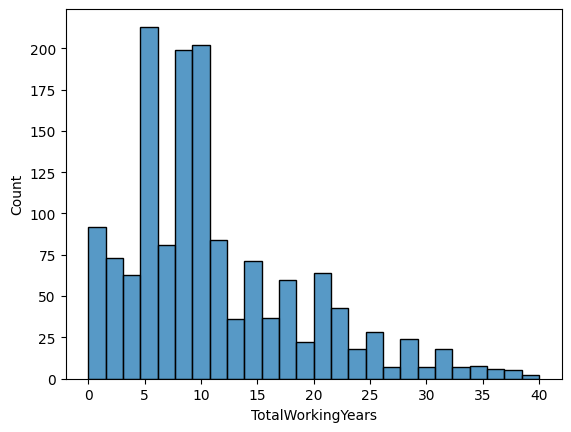

<Axes: xlabel='TrainingTimesLastYear', ylabel='Count'>

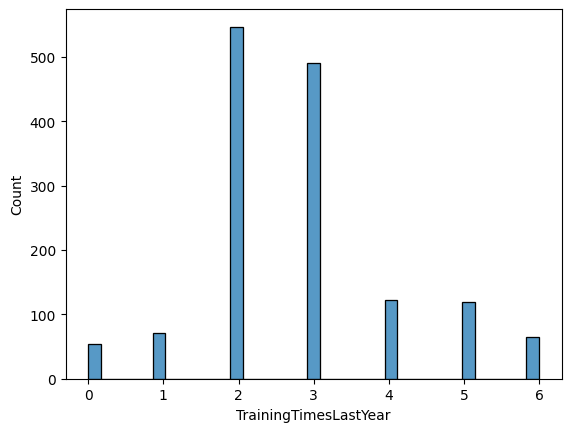

<Axes: xlabel='NumCompaniesWorked', ylabel='Count'>

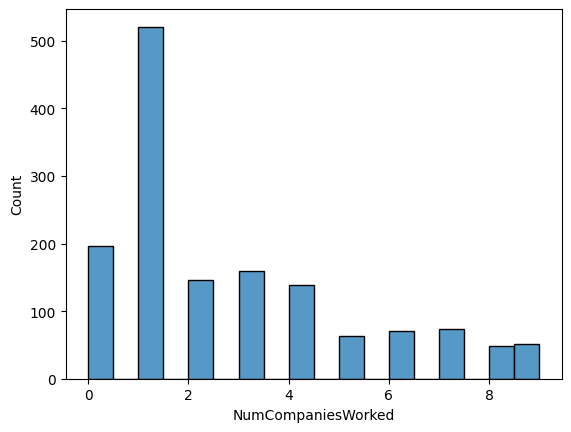

<Axes: xlabel='YearsAtCompany', ylabel='Count'>

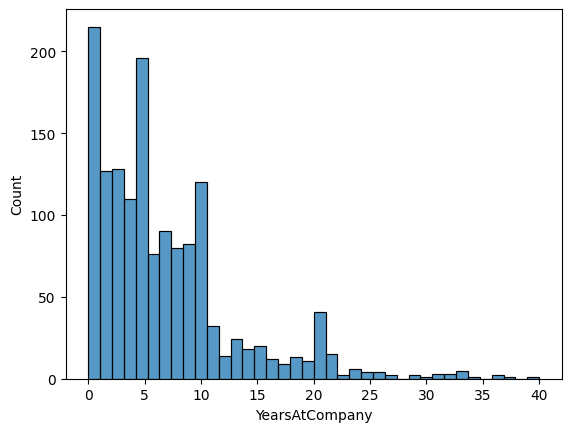

<Axes: xlabel='YearsInCurrentRole', ylabel='Count'>

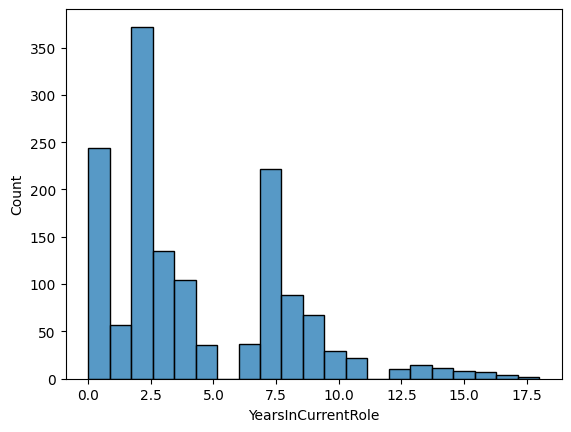

<Axes: xlabel='YearsSinceLastPromotion', ylabel='Count'>

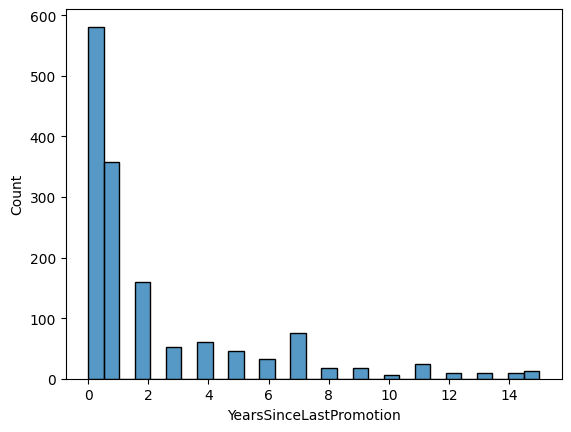

<Axes: xlabel='YearsWithCurrManager', ylabel='Count'>

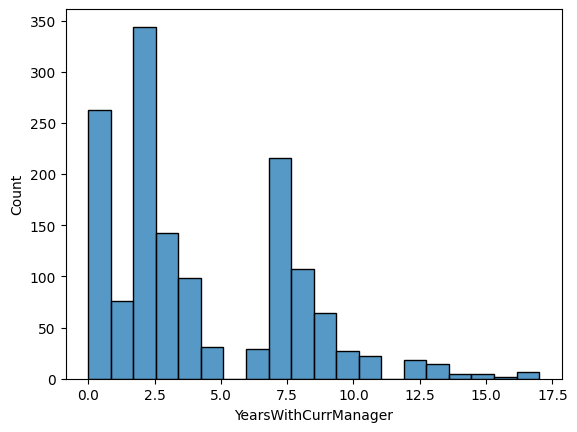

In [20]:
history_var = ['TotalWorkingYears', 'TrainingTimesLastYear', 'NumCompaniesWorked',
 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']
for var in history_var:
    sns.histplot(data = df, x = var)
    plt.show()

<Axes: xlabel='Attrition', ylabel='TotalWorkingYears'>

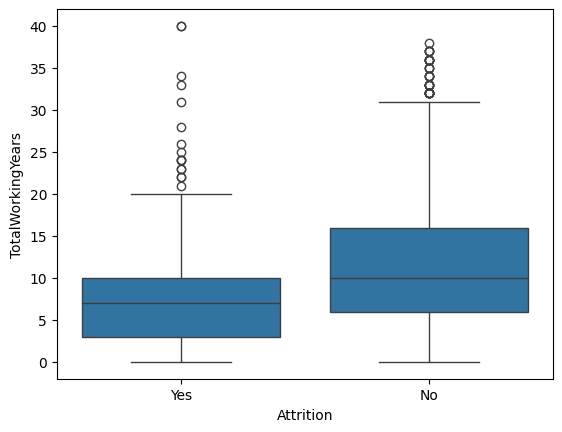

<Axes: xlabel='Attrition', ylabel='TrainingTimesLastYear'>

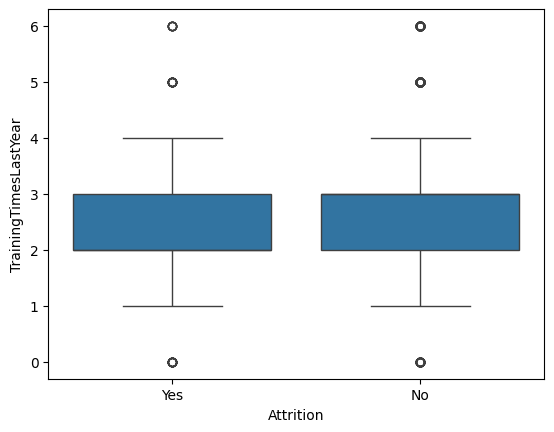

<Axes: xlabel='Attrition', ylabel='NumCompaniesWorked'>

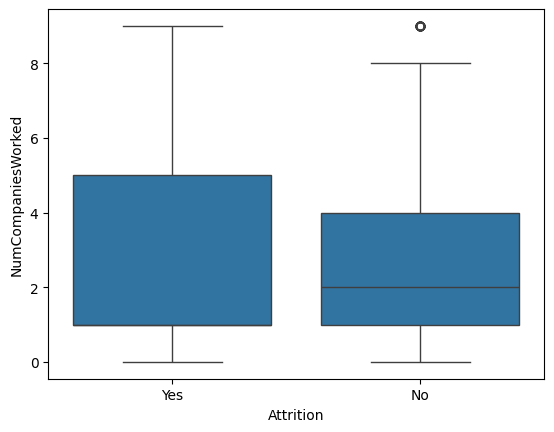

<Axes: xlabel='Attrition', ylabel='YearsAtCompany'>

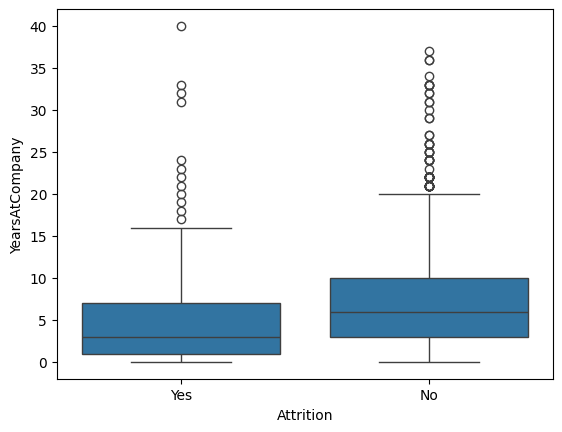

<Axes: xlabel='Attrition', ylabel='YearsInCurrentRole'>

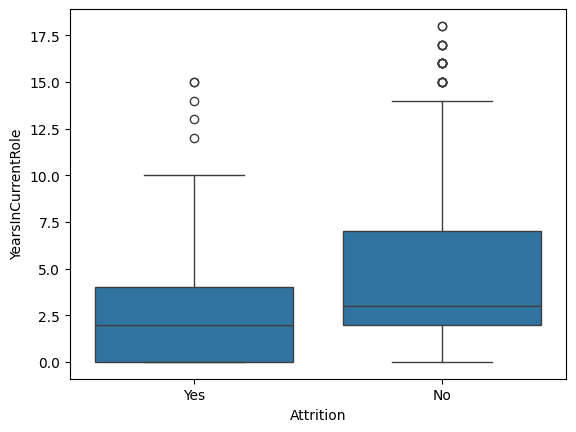

<Axes: xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

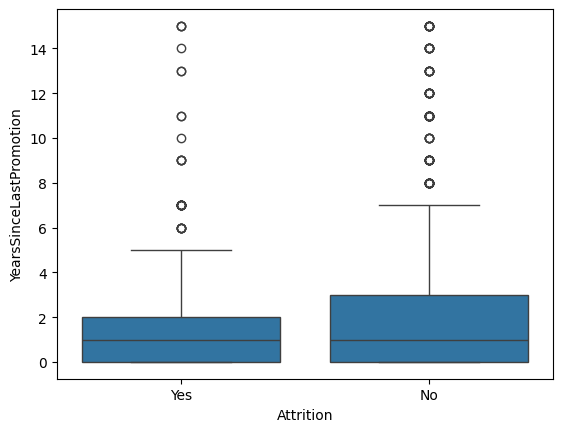

<Axes: xlabel='Attrition', ylabel='YearsWithCurrManager'>

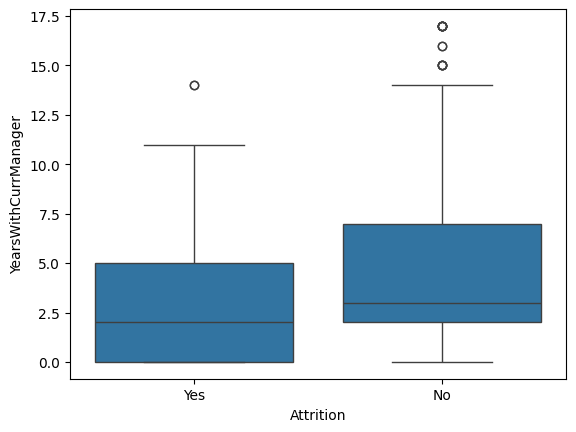

In [21]:
for var in history_var:
    sns.boxplot(data = df, x = 'Attrition', y = var)
    plt.show()

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

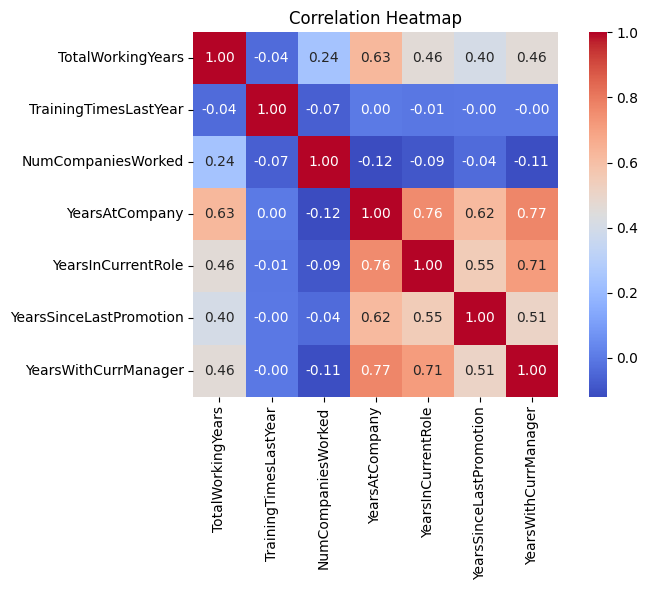

In [22]:
# Plot the correlation matrix of history variables
hist_corr = df[history_var].corr()
# plot
plt.figure(figsize=(8, 6))
sns.heatmap(hist_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df[history_var])
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


In [24]:
vif

,Variable,VIF
0,const,9.614324
1,TotalWorkingYears,1.979328
2,TrainingTimesLastYear,1.005278
3,NumCompaniesWorked,1.217294
4,YearsAtCompany,4.494398
5,YearsInCurrentRole,2.668855
6,YearsSinceLastPromotion,1.663605
7,YearsWithCurrManager,2.724068


I checked their collinearity using correlation and VIF. Although VIF values are not very alarming, I still decide to drop 'YearsAtCompany', as it is highly correlated with two other variables 'YearsInCurrentRole' and 'YearsWithCurrManager'.

In [25]:
df.drop('YearsAtCompany', axis = 1, inplace = True)

11. I checked for missing values and did not find any.  Please refer to the slides "Data Preparation - Feature Engineering" for detailed information about what we need to do to prepare features for our model building.<br>
Let's assume we do not need generate new features.

In [26]:
df.isna().sum()
# No missing values

,0
Age,0
Attrition,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0
Gender,0
JobInvolvement,0


In [27]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Attrition'].isna().sum()

np.int64(0)

12. Finally, we will code the categorical variables. Some variables have already been ordinally coded, such as Education and the satisfaction variables.<br>
We have the following categorical variables to be coded.<br>
['BusinessTravel', 'Department',
       'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
       'OverTime']<br>
We will use dummy variable (one-hot coding) for them.<br>
Let's prepare our X and y: target variable 'Attrition' and the rest are predictor variables. Code the dummy variables for X.

In [28]:
# Map 'Attrition' column to numerical values
# df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
# df.isna().sum()
# df = df.dropna()

categorical_vars = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
y = df['Attrition']
X = df.drop('Attrition', axis=1)
X = pd.get_dummies(X, columns=categorical_vars, drop_first=True)
X = X.astype(int)

y.head()
X.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,2,2,3,2,4,5993,8,11,...,0,0,0,0,0,1,0,0,1,1
1,49,8,1,3,2,2,2,5130,1,23,...,0,0,0,0,1,0,0,1,0,0
2,37,2,2,4,2,1,3,2090,6,15,...,1,0,0,0,0,0,0,0,1,1
3,33,3,4,4,3,1,3,2909,1,11,...,0,0,0,0,1,0,0,1,0,1
4,27,2,1,1,3,1,2,3468,9,12,...,1,0,0,0,0,0,0,1,0,0


13. Split training and test dataset

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

14. Use a logistic regression model to examine which variables play a significant role in employee attrition.

In [30]:
import statsmodels.api as sm

# Fit the logistic regression model
log_reg = sm.Logit(y_train, x_train).fit()

# Print the model summary
print(log_reg.summary())

# Get p-values for all coefficients
p_values = log_reg.pvalues

# Identify significant variables (e.g., p-value < 0.05)
significant_variables = p_values[p_values < 0.05]

print("\nSignificant Variables (p-value < 0.05):")
significant_variables


Optimization terminated successfully.
         Current function value: 0.290934
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1136
Method:                           MLE   Df Model:                           39
Date:                Tue, 01 Apr 2025   Pseudo R-squ.:                  0.3582
Time:                        15:50:42   Log-Likelihood:                -342.14
converged:                       True   LL-Null:                       -533.07
Covariance Type:            nonrobust   LLR p-value:                 7.552e-58
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0291      0.015     -1

,0
DistanceFromHome,2.769028e-04
EnvironmentSatisfaction,6.051244e-05
JobInvolvement,1.704293e-04
JobSatisfaction,5.980794e-06
NumCompaniesWorked,1.734716e-05
TrainingTimesLastYear,4.357915e-02
WorkLifeBalance,6.705028e-03
YearsInCurrentRole,5.432861e-03
YearsSinceLastPromotion,5.303707e-06
BusinessTravel_Travel_Frequently,5.187611e-05


15. Build two decision tree models (by varying the tree parameters) to make predictions. Evaluate your results using performance metrics we have learned.

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model 1: Default parameters
dt_model_1 = DecisionTreeClassifier(criterion='entropy')
dt_model_1.fit(x_train, y_train)
y_pred_1 = dt_model_1.predict(x_test)

# Evaluate Model 1
accuracy_1 = accuracy_score(y_test, y_pred_1)
print(f"Model 1 Accuracy: {accuracy_1}")
print("Model 1 Classification Report:\n", classification_report(y_test, y_pred_1))
print("Model 1 Confusion Matrix:\n")
pd.crosstab(y_test, y_pred_1, rownames=['True'], colnames=['Predicted'])

# Model 2: Adjusted parameters (e.g., max_depth, min_samples_split)
dt_model_2 = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=0)
dt_model_2.fit(x_train, y_train)
y_pred_2 = dt_model_2.predict(x_test)

# Evaluate Model 2
accuracy_2 = accuracy_score(y_test, y_pred_2)
print(f"\nModel 2 Accuracy: {accuracy_2}")
print("Model 2 Classification Report:\n", classification_report(y_test, y_pred_2))
print("Model 2 Confusion Matrix:\n")
pd.crosstab(y_test, y_pred_2, rownames=['True'], colnames=['Predicted'])

# Model 2 has higher overall accuracy (84.35%) but is even worse at predicting employees who leave.
# Model 1, while slightly better at recall (23% vs. 13%), still struggles to detect attrition cases.

DecisionTreeClassifier(criterion='entropy')

Model 1 Accuracy: 0.7687074829931972
Model 1 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86       255
           1       0.19      0.23      0.21        39

    accuracy                           0.77       294
   macro avg       0.54      0.54      0.54       294
weighted avg       0.79      0.77      0.78       294

Model 1 Confusion Matrix:



Predicted,0,1
True,,
0,217,38
1,30,9


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)


Model 2 Accuracy: 0.8435374149659864
Model 2 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       255
           1       0.29      0.13      0.18        39

    accuracy                           0.84       294
   macro avg       0.59      0.54      0.55       294
weighted avg       0.80      0.84      0.82       294

Model 2 Confusion Matrix:



Predicted,0,1
True,,
0,243,12
1,34,5
